In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# getting data
df = pd.read_csv("M1_final.csv")
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


/var/folders/rt/462tlf2j5bsgw0jc6blrpts80000gn/T/ipykernel_43709/1913634616.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(df1, x = "DEST", palette="deep")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'LAX'),
  Text(1, 0, 'FLL'),
  Text(2, 0, 'MCO'),
  Text(3, 0, 'ATL'),
  Text(4, 0, 'ORD'),
  Text(5, 0, 'BUF'),
  Text(6, 0, 'LAS'),
  Text(7, 0, 'DCA'),
  Text(8, 0, 'PHX'),
  Text(9, 0, 'SFO'),
  Text(10, 0, 'SJU'),
  Text(11, 0, 'SLC'),
  Text(12, 0, 'BOS'),
  Text(13, 0, 'SEA'),
  Text(14, 0, 'MIA'),
  Text(15, 0, 'TPA'),
  Text(16, 0, 'CLT'),
  Text(17, 0, 'RDU'),
  Text(18, 0, 'ROC')])

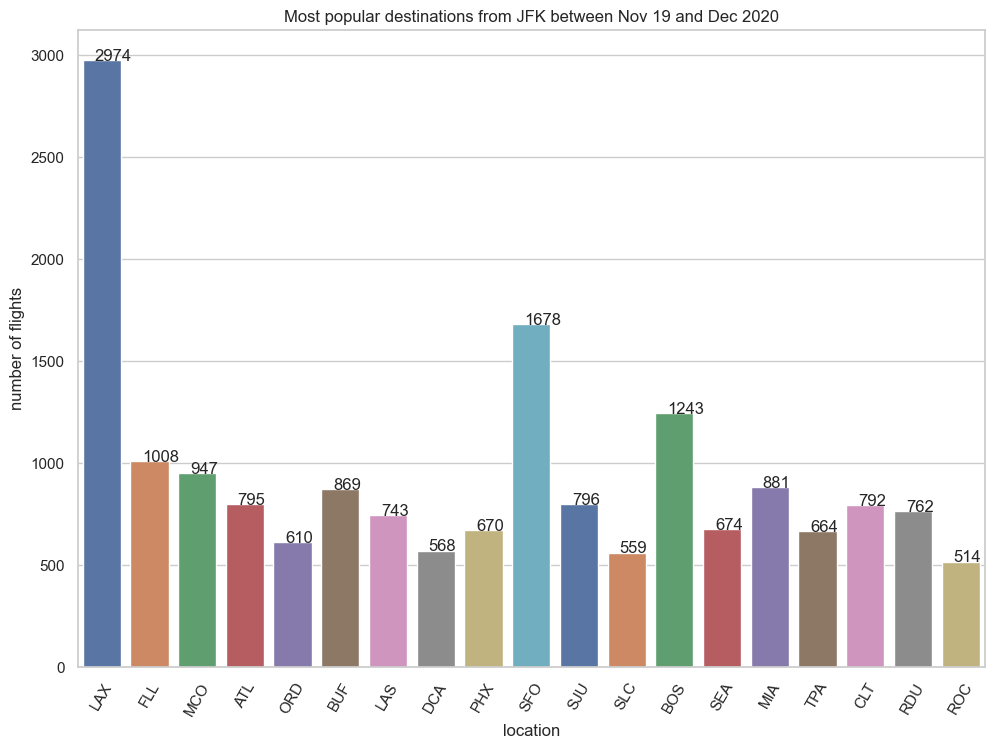

In [49]:
# setting sns theme
sns.set_theme(style="whitegrid", rc={'figure.figsize':(11.7,8.27)})

### where the flights are going (DEST)

# deleting rows where the destination shows up less than 500 times
multi = df["DEST"].value_counts() >= 500
df1 = df[df["DEST"].isin(multi[multi].index)]

# checking how many going to each DEST
df1["DEST"].value_counts()

# creating bar chart for DEST
chart = sns.countplot(df1, x = "DEST", palette="deep")
for p in chart.patches:
   chart.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Most popular destinations from JFK between Nov 19 and Dec 2020")
plt.ylabel("number of flights")
plt.xlabel("location")
plt.xticks(rotation=60)

/var/folders/rt/462tlf2j5bsgw0jc6blrpts80000gn/T/ipykernel_43709/1809527874.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = "day", palette="deep")


([<matplotlib.axis.XTick at 0x1242bb7d0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

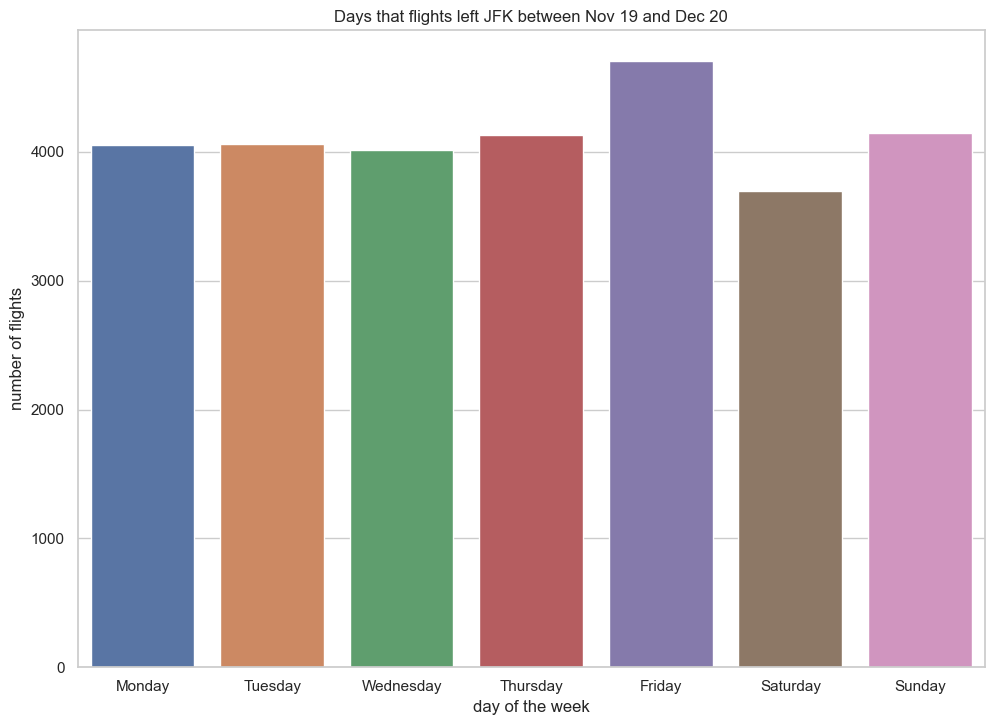

In [94]:
### the days the flights leave

# preparing to change numbers to days of the week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def day(input):
  result = days[input - 1]
  return result

df["day"] = df["DAY_OF_WEEK"].apply(day)

# checking how many flying on each day
df["day"].value_counts()

# ordering the df by day of the week zone so that the values are over the correct xticks
df["day"] = pd.CategoricalIndex(df["day"], ordered=True, categories=days)

# creating a bar chart -- ZONE
x_axis = np.arange(len(days)) 
sns.countplot(df, x = "day", palette="deep")
plt.title("Days that flights left JFK between Nov 19 and Dec 20")
plt.xlabel("day of the week")
plt.ylabel("number of flights")
plt.xticks(x_axis, days) 


<Axes: xlabel='DEP_DELAY'>

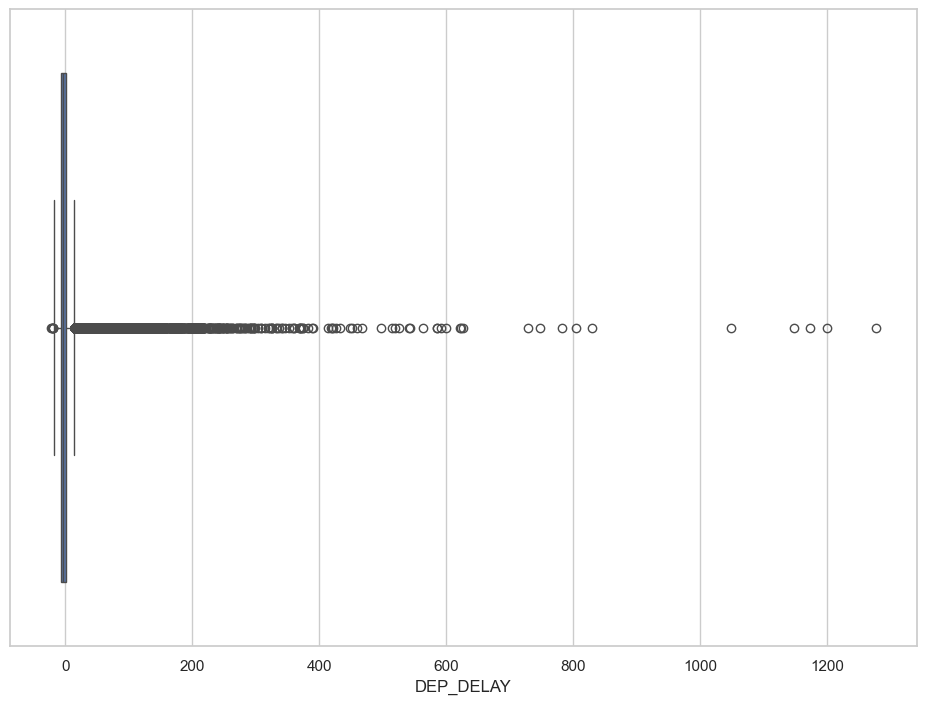

In [103]:
sns.boxplot(x=df["DEP_DELAY"])

count    28820.000000
mean         6.374983
std         38.735144
min        -22.000000
25%         -6.000000
50%         -3.000000
75%          2.000000
max       1276.000000
Name: DEP_DELAY, dtype: float64
count    24633.000000
mean        -3.248691
std          4.856041
min        -17.000000
25%         -6.000000
50%         -4.000000
75%         -1.000000
max         13.000000
Name: DEP_DELAY, dtype: float64


Text(0.5, 0, 'Minutes')

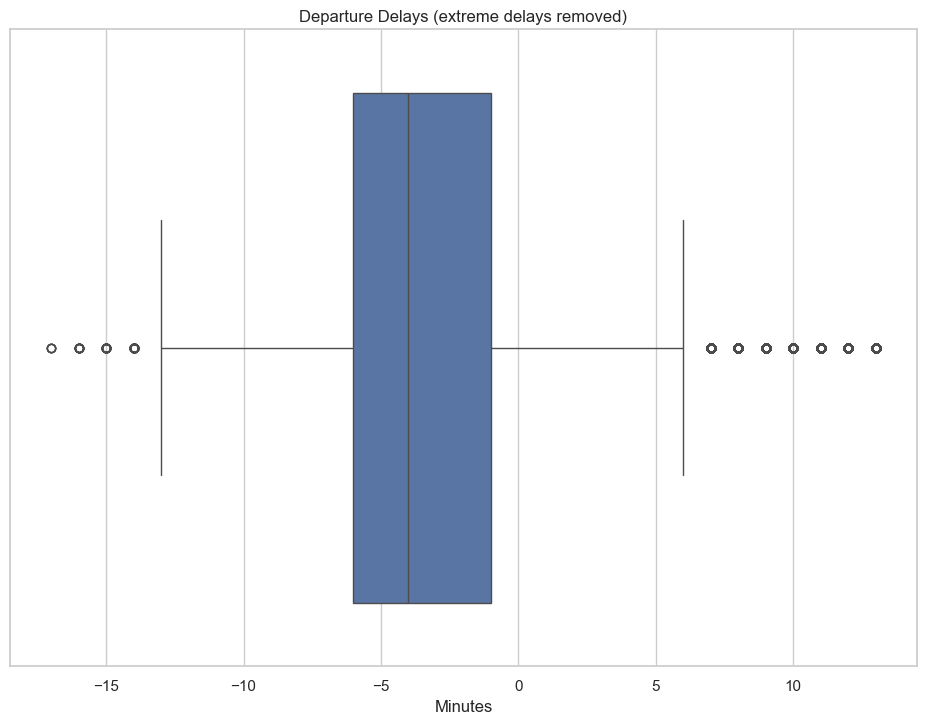

In [60]:
### box plot for delay

# remove outliers so that the boxplot isn't impossible to look at (this removed 4187 flights)
df1 = pd.read_csv("M1_final.csv")
Q1 = df1["DEP_DELAY"].quantile(0.25)
Q3 = df1["DEP_DELAY"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(df1["DEP_DELAY"] >= upper)[0]
lower_array = np.where(df1["DEP_DELAY"] <= lower)[0]
df1.drop(index=upper_array, inplace=True)
df1.drop(index=lower_array, inplace=True)
print(df["DEP_DELAY"].describe())
print(df1["DEP_DELAY"].describe())

# make box plot
sns.boxplot(x=df1["DEP_DELAY"])
plt.title("Departure Delays (extreme delays removed)")
plt.xlabel("Minutes")


Text(0.5, 0, 'Minutes')

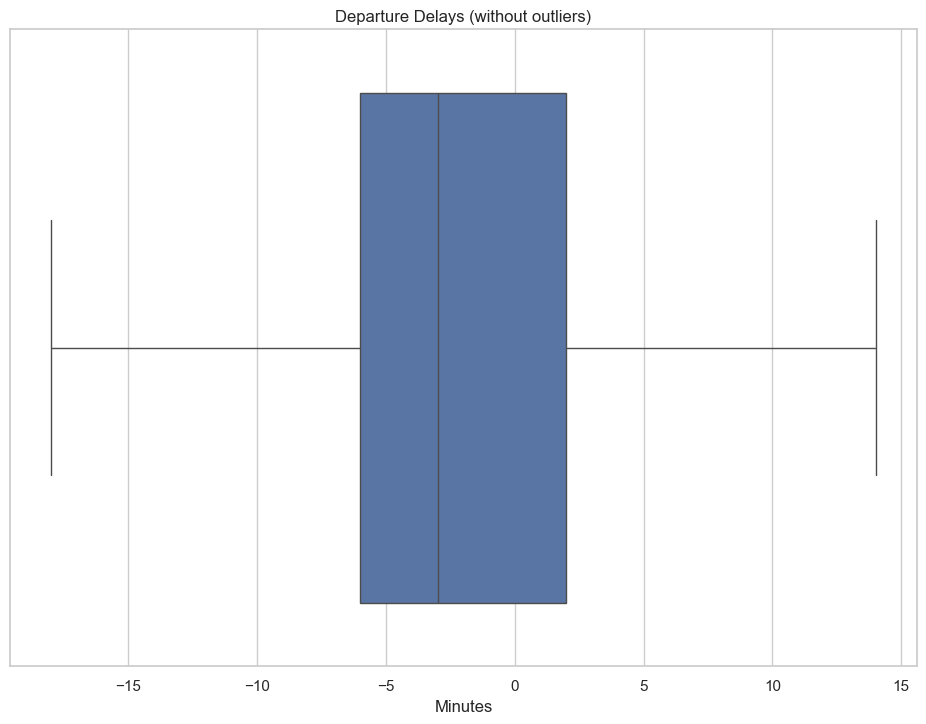

In [102]:
sns.boxplot(x=df["DEP_DELAY"], showfliers=False)
plt.title("Departure Delays (without outliers)")
plt.xlabel("Minutes")

count    28820.000000
mean        20.858570
std          6.851915
min          5.000000
25%         16.000000
50%         19.000000
75%         25.000000
max         41.000000
Name: TAXI_OUT, dtype: float64


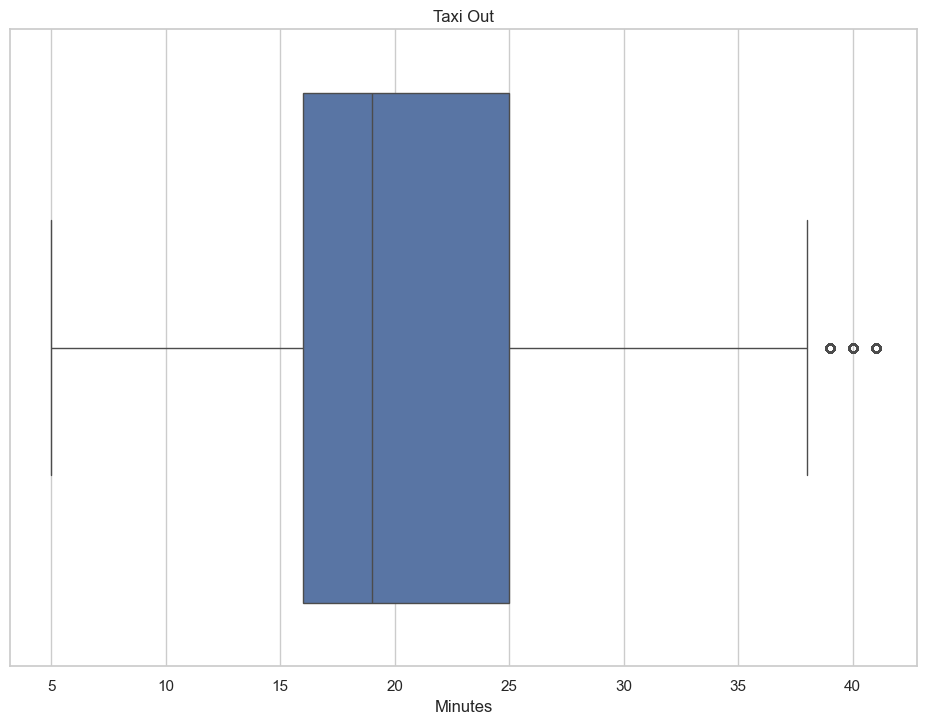

In [62]:
### box plot for taxi time
sns.boxplot(x=df["TAXI_OUT"])
plt.title("Taxi Out")
plt.xlabel("Minutes")
print(df["TAXI_OUT"].describe())

In [118]:
### look for missing values and delete those rows of data
df.isnull().sum()
df2 = df.dropna(axis = 0, how = "any")
df2.isnull().sum()


MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
day                  0
dtype: int64

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
day                  0
dtype: int64

0.004749906736238985


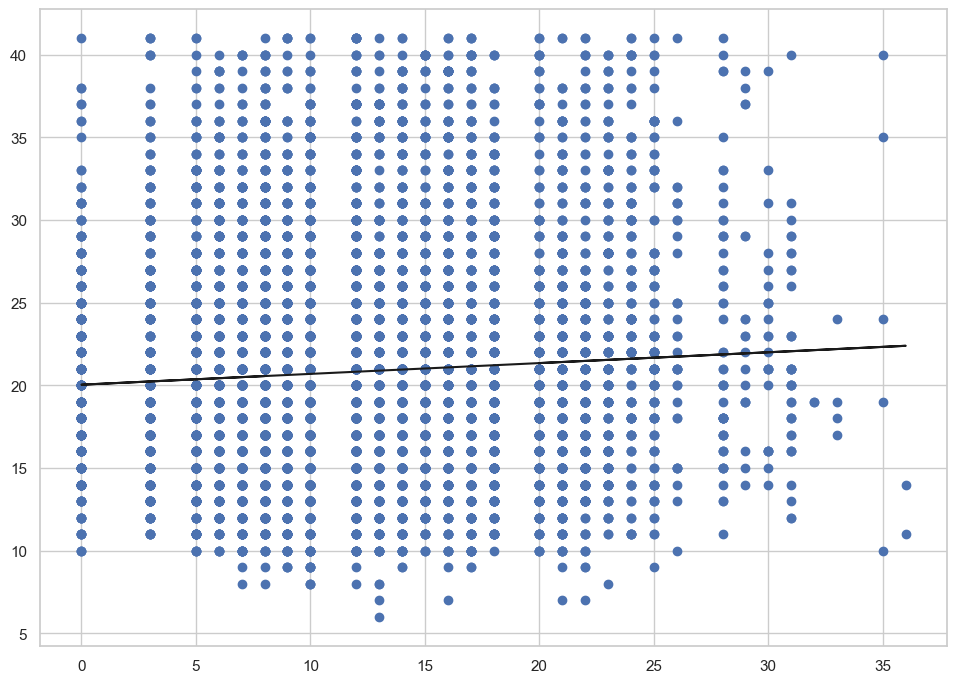

In [104]:
### binary regression

X = df2['Wind Speed'].values.reshape(-1, 1)
y = df2['TAXI_OUT'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
regr = LinearRegression() 
regr.fit(X_train, y_train) 

print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 


In [117]:
### regression with many variables

X = df[['MONTH','DEP_DELAY','DAY_OF_WEEK','DAY_OF_MONTH','CRS_ELAPSED_TIME','DISTANCE','DEP_TIME_M','CRS_ARR_M','Temperature','Dew Point','Humidity','Wind Speed','Wind Gust','Pressure','sch_dep','sch_arr']]
y = df['TAXI_OUT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
regr = LinearRegression() 
regr.fit(X_train, y_train)
 
print(regr.score(X_test, y_test))
    
y_pred = regr.predict(X_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

0.07654539746654909


,Actual,Predicted
4932,14,17.339747
4141,26,21.814386
8102,16,18.093170
5514,34,25.192635
11682,23,21.225487
...,...,...
16853,19,21.909046
13586,20,22.940238
7436,10,18.792480
7870,27,24.830284


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

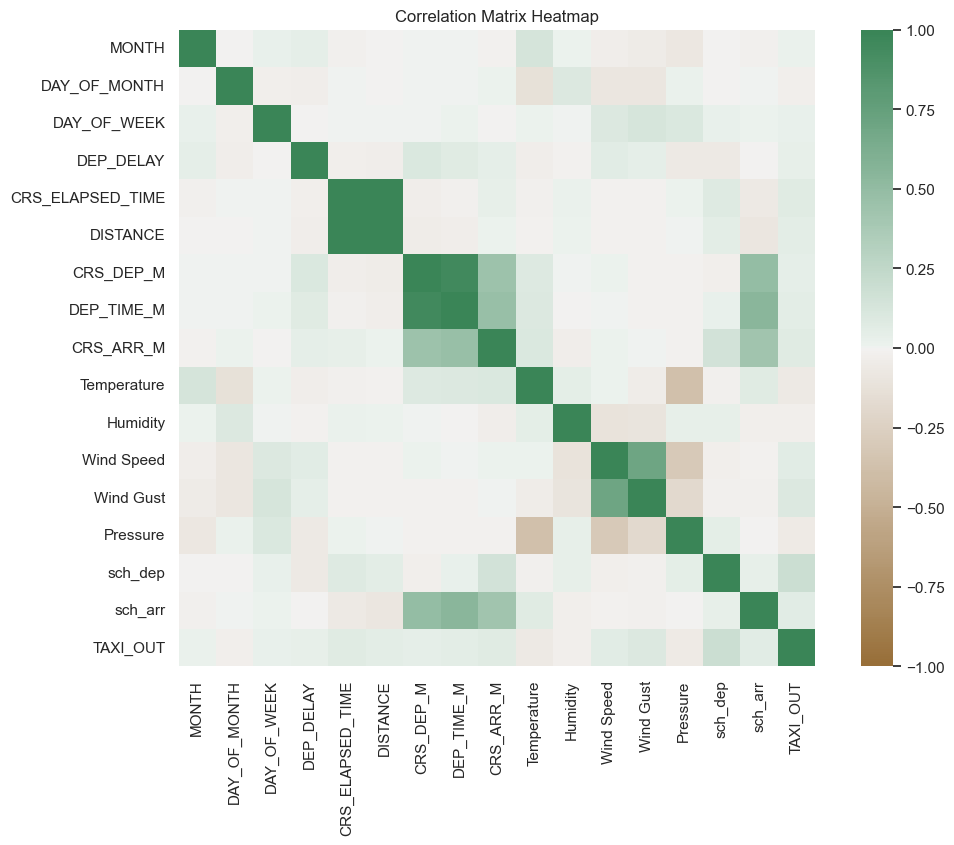

In [128]:
### correlation heatmap

corr_matrix = df.corr(numeric_only=True)
axis_corr = sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(50, 500, n=500), square=True)
plt.title("Correlation Matrix Heatmap", loc="center")